In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

%matplotlib inline

font_options = {'family' : 'monospace'}
figure_options = {'figsize':[8,5]}

plt.rc('font', **font_options) 
plt.rc('figure', **figure_options)

In [2]:
class GradientDescent:
    """
    Class : GradientDescent

    ....................^_^.....................

    Attributes
    ----------
    points : int, default = 1000
        amount of points for generator
        
    polynomial degree: int, default = 3
        degree of polynom
        
    start_params : np.array, default None, size = degree + 1
        start point for GD
        
    num_iter : int, default = 10000
        steps in GD
        
    lr: float, default = 0.1
        learning rate in GD
        
    """
    def __init__(self, points: int = 1000, polynomial_degree: int = 3, \
                 start_params: np.array = None, num_iter: int = 10000, lr = 0.1):
        
        self.points = points
        self.degree = polynomial_degree
        
        if start_params == None:
            self.params = np.zeros(self.degree+1)
        else:
            self.params = start_params
            
        self.iterations = num_iter
        self.learning_rate = lr
        
        self.x = None
        self.y = None
        self._XT = None
        self.true = None

    def generate_points(self) -> (np.array,np.array): 
        '''
        generate points
        '''
        
        self.x = np.linspace(0, 1, num = self.points)        
        self.y = np.cos(1.5*np.pi*self.x) + np.random.normal(0, 1, size = self.points)*0.02
        return self.x, self.y

    def grad(self, f, x, eps = 2**(-24)) -> np.array:
        '''
        return gradient of function
        '''
        value = np.array([f(x + dx) - f(x) for dx in eps * np.eye(x.shape[0])])
        return value / eps
    
    def mse(self): 
        '''
        return functional of quality
        '''
        MSE = lambda p: np.mean((self.y - self._XT@p)**2)
        return MSE

    def grad_descent(self):
        '''
        return fitted params and polyfeatures matrix _XT
        '''

        self.generate_points()
        
        poly = PolynomialFeatures(self.degree)
        self._XT = poly.fit_transform(self.x.reshape(-1,1))

        for _ in range(self.iterations):
            self.params -= self.grad(f = self.mse(), x = self.params)*self.learning_rate
        return self.params, self._XT
    
    def visual(self):
        '''
        visualisation of GD, returns pyplot
        '''
        self.grad_descent()
        prediction = self._XT @ self.params
        self.true = np.linalg.inv( self._XT.T@self._XT ) @ self._XT.T @self.y
        
        fig, ax = plt.subplots(figsize = (16,10),sharex=True,sharey=True,frameon = False)
        
        ax.plot(self.x, prediction, label = f'Polynomial Regression: Degree {self.degree}, {self.params}', color = 'blue')
        
        ax.scatter(self.x, self.y, s = 1, label = r'$y = 1.5\cos(1.5 \pi x)$', color = 'black')
        
        ax.plot(self.x, self._XT @ self.true, label = f'Best Fitted: {self.true}', color = 'red')
        ax.set_title('Polynomial Regression Gradient Descent')
        
        plt.legend()
        plt.grid()
        plt.show()

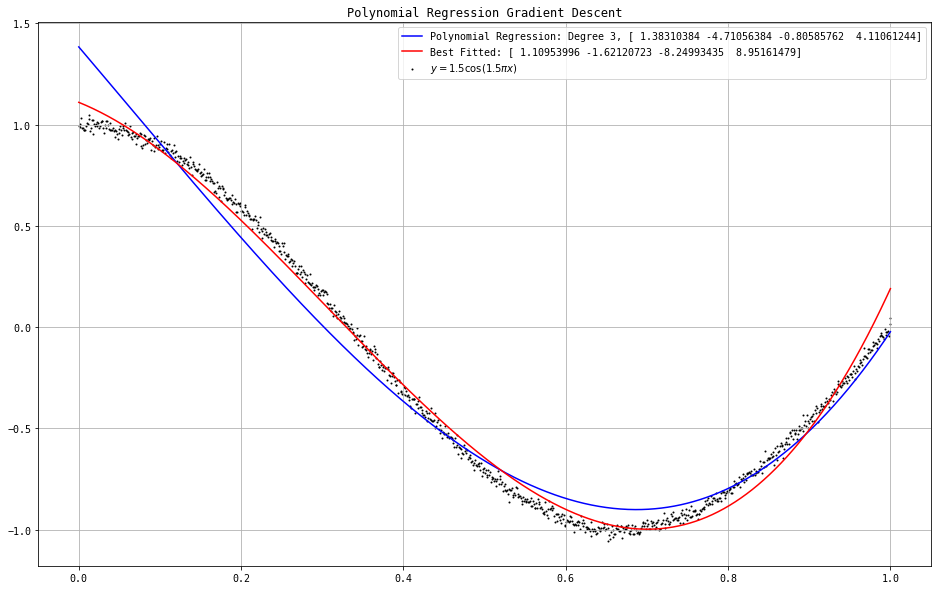

In [3]:
GD = GradientDescent(polynomial_degree=3,num_iter = 6000)
GD.visual()